In [1]:
import spacy
import os
from spacy.lang.en import English
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from statistics import mean
from sklearn.model_selection import train_test_split, GridSearchCV
import gensim
from gensim import corpora
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation as LDA
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("vader_lexicon")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jackd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jackd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#Functions to get information for topic labelling
spacy.load('en_core_web_sm')
parser = English()
stop_words = nltk.corpus.stopwords.words('english')
def tokenize(text):#tokenize text
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

#lemma words
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
#Preprocess test
def prep_text(text):
    tokens = tokenize(text)#tokenize the snetence
    tokens = [token for token in tokens if len(token) > 4]#checks length
    tokens = [token for token in tokens if token not in stop_words]#remove stopwords
    tokens = [get_lemma(token) for token in tokens]#gets leamma for tokes
    return tokens

In [4]:
accounts_data = []
biology_data = []
geography_data = []
history_data = []
maths_data = []
physics_data = []
software_data = []

#reads in eacg file in each folder and colects the tokens with the above funcitons
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/accounts/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    accounts_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/biology/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    biology_data.append(tokens)

for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/geography/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    geography_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/history/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    history_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/maths/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    maths_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/physics/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    physics_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/software/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    software_data.append(tokens)

100%|███████████████████████████████████████████████████████████████████████████████| 642/642 [00:01<00:00, 397.62it/s]


In [5]:
#Remove blank results from the lsits
accounts_data = [x for x in accounts_data if x != []]
biology_data = [x for x in biology_data if x != []]
geography_data = [x for x in geography_data if x != []]
history_data = [x for x in history_data if x != []]
maths_data = [x for x in maths_data if x != []]
physics_data = [x for x in physics_data if x != []]
software_data = [x for x in software_data if x != []]

In [6]:
def topicwords(data):
    temp = []
    for i in range(len(data)):
        for j in range(len(data[i])):
            temp.append(data[i][j])
    return temp

In [7]:
accwords = nltk.FreqDist(topicwords(accounts_data))
biowords = nltk.FreqDist(topicwords(biology_data))
geowords = nltk.FreqDist(topicwords(geography_data))
hiswords = nltk.FreqDist(topicwords(history_data))
mathswords = nltk.FreqDist(topicwords(maths_data))
phywords = nltk.FreqDist(topicwords(physics_data))
softwords = nltk.FreqDist(topicwords(software_data))

acctopic = {word for word, count in accwords.most_common(100)}#selects most common words in each dist
biotopic = {word for word, count in biowords.most_common(100)}#selects most common words in each dist
geotopic = {word for word, count in geowords.most_common(100)}#selects most common words in each dist
histtopic = {word for word, count in hiswords.most_common(100)}#selects most common words in each dist
mathstopic = {word for word, count in mathswords.most_common(100)}#selects most common words in each dist
phytopic = {word for word, count in phywords.most_common(100)}#selects most common words in each dist
softtopic = {word for word, count in softwords.most_common(100)}#selects most common words in each dist

In [8]:
def feats1(data,label):
    temp = {}
    for i in range(len(data)):
        acc = 0
        bio = 0
        geo = 0
        his = 0
        ma = 0
        phy = 0
        soft = 0
        for j in range(len(data[i])):
            if data[i][j] in acctopic:
                acc +=1
            elif data[i][j] in biotopic:
                bio +=1
            elif data[i][j] in geotopic:
                geo +=1
            elif data[i][j] in histtopic:
                his +=1
            elif data[i][j] in mathstopic:
                ma +=1
            elif data[i][j] in phytopic:
                phy +=1
            elif data[i][j] in softtopic:
                soft +=1
            
            temp[i] = {'Topic':label,'Acc_score':acc,'Bio_score':bio,'Geo_score':geo,
                       'Hist_score':his,'Math_score':ma,'Phy_score':phy,'Soft_score':soft}
    return temp

In [9]:
rowlisttrain = []
rowlisttest = []

a = feats1(accounts_data, 'Account')
b = feats1(biology_data, 'Biology')
g = feats1(geography_data, 'Geography')
h = feats1(history_data, 'history')
m = feats1(maths_data, 'Maths')
p = feats1(physics_data, 'Physics')
s = feats1(software_data, 'Software')

traina, testa = train_test_split(a, test_size=0.3)
trainb, testb = train_test_split(b, test_size=0.3)
traing, testg = train_test_split(g, test_size=0.3)
trainh, testh = train_test_split(h, test_size=0.3)
trainm, testm = train_test_split(m, test_size=0.3)
trainp, testp = train_test_split(p, test_size=0.3)
trains, tests = train_test_split(s, test_size=0.3)

for j in range(len(traina)):
    rowlisttrain.append(traina[j])
    
for j in range(len(trainb)):
    rowlisttrain.append(trainb[j])
    
for j in range(len(traing)):
    rowlisttrain.append(traing[j])
    
for j in range(len(trainh)):
    rowlisttrain.append(trainh[j])
    
for j in range(len(trainm)):
    rowlisttrain.append(trainm[j])
    
for j in range(len(trainp)):
    rowlisttrain.append(trainp[j])
    
for j in range(len(trains)):
    rowlisttrain.append(trains[j])

for j in range(len(testa)):
    rowlisttest.append(testa[j])

for j in range(len(testb)):
    rowlisttest.append(testb[j])
    
for j in range(len(testg)):
    rowlisttest.append(testg[j])
    
for j in range(len(testh)):
    rowlisttest.append(testh[j])
    
for j in range(len(testm)):
    rowlisttest.append(testm[j])
    
for j in range(len(testp)):
    rowlisttest.append(testp[j])
    
for j in range(len(tests)):
    rowlisttest.append(tests[j])

        
dftrain = pd.DataFrame(rowlisttrain)
dftest = pd.DataFrame(rowlisttest)

In [10]:
#split the data into test train split
feat_train = dftrain.iloc[:, 1:8]
label_train = dftrain.iloc[:,0:1]

feat_test = dftest.iloc[:, 1:8]
label_test = dftest.iloc[:,0:1]

In [11]:
param = {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['linear', 'rbf']} #set param to test
Tune_SVC = GridSearchCV(estimator=SVC(), param_grid=param, cv=10, scoring='accuracy') #establish classifier and params
Tune_SVC.fit(feat_train, label_train)#fits data to run on
print("Best Parameters:")
print(Tune_SVC.best_estimator_)

df_SVC = pd.DataFrame({'parameters':Tune_SVC.cv_results_["params"], 'Mean_Accuracy':Tune_SVC.cv_results_["mean_test_score"]})
df_SVC#gathers the data into a daatframe for easy viewing

C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best Parameters:
SVC(C=1, gamma=0.001, kernel='linear')


C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,parameters,Mean_Accuracy
0,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.677960
1,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.368578
2,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.677960
3,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.283908
4,"{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}",0.675621
5,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.661695
6,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}",0.675621
7,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.368578
8,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.677934
9,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.677920


C:\Users\jackd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction accuracy = 0.7066666666666667


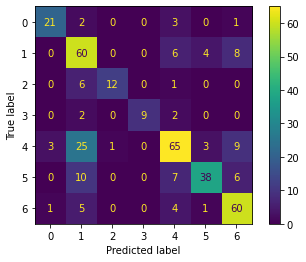

In [12]:
clf = SVC(C=10, gamma=0.001, kernel='linear')#build and test classifier
clf.fit(feat_train, label_train)

predict = clf.predict(feat_test)

matrix = confusion_matrix(label_test, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix= matrix)

print('Prediction accuracy =', accuracy_score(label_test, predict))
cm_display.plot()
plt.show()

Method 2 - predicted based on bag of words

In [ ]:
#Could not get input to work for this task